In [1]:
import logging

import numpy as np
import matplotlib.pyplot as plt

try:
    import keysightSD1
except:
    import sys
    sys.path.append(r"C:\Program Files (x86)\Keysight\SD1\Libraries\Python")
    import keysightSD1
    
import qcodes
from qcodes_contrib_drivers.drivers.Keysight.M3202A import M3202A

import qcodes.logger as logger
from qcodes.logger import start_all_logging

from waveforms import create_sine, create_gaussian, basic_autotrig_oneshot

start_all_logging()
# logger.get_file_handler().setLevel(logging.DEBUG)

# try to close station from previous run.
try:
    station.close_all_registered_instruments()
except: pass

# setup station
awg = M3202A("AWG", chassis = 1, slot = 4)

station = qcodes.Station()
station.add_component(awg)

SAMPLE_RATE_MSPS = 1000 # 1 GS/s

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\noah\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


2021-05-21 17:44:13,645 ¦ qcodes.instrument.base ¦ WARNING ¦ base ¦ snapshot_base ¦ 215 ¦ [AWG(M3202A)] Snapshot: Could not update parameter: status


Qcodes Logfile : C:\Users\noah\.qcodes\logs\210521-18908-qcodes.log


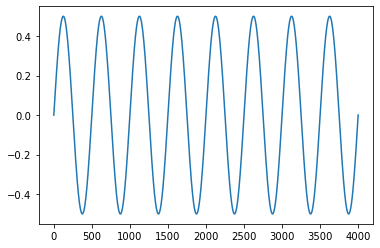

In [5]:
# Sine Wave Demo
wave = 0.5 * create_sine(500, 8, SAMPLE_RATE_MSPS)
plt.plot(wave)

basic_autotrig_oneshot(awg, 1, wave, SAMPLE_RATE_MSPS)

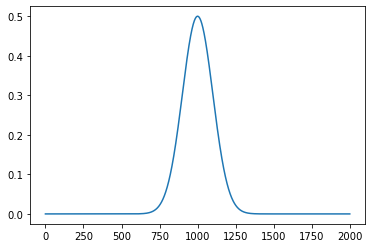

In [8]:
# Gaussian Demo
wave = create_gaussian(0.5, 0, 100, 2000, SAMPLE_RATE_MSPS)
plt.plot(wave)

basic_autotrig_oneshot(awg, 1, wave, SAMPLE_RATE_MSPS)

In [ ]:
# trigger AWG

awg.set_pxi_trigger(keysightSD1.SD_TriggerValue.HIGH, 1, verbose=True)
awg.set_pxi_trigger(keysightSD1.SD_TriggerValue.LOW, 1, verbose=True)



# trigger setup
# TRIGGER_PXI_LINE = 1 # NOTE: keysightSD1.SD_TriggerExternalSources is out-of-date (the 4000 is no longer used)
# TRIGGER_MODE = keysightSD1.SD_TriggerBehaviors.TRIGGER_FALL
# TRIGGER_ON = 0
# TRIGGER_OFF = 1

# for ch in range(1,5):
#     awg.set_channel_offset(0.0, ch)
#     awg.set_channel_amplitude(0.5, ch)

#     awg.set_channel_wave_shape(keysightSD1.SD_Waveshapes.AOU_AWG, ch)
#     awg.awg_queue_config(ch, keysightSD1.SD_QueueMode.CYCLIC)
#     awg.awg_config_external_trigger(ch, TRIGGER_PXI_LINE, TRIGGER_MODE)

# wave_awg = awg.upload_waveform(wave)

# delay = 0
# ext_trigger = keysightSD1.SD_TriggerModes.EXTTRIG
# auto_trigger = keysightSD1.SD_TriggerModes.AUTOTRIG
# cycles = 0
# prescaler = get_prescaler(sample_rate_MSps)
# awg.awg_queue_waveform(1, wave_awg, ext_trigger, delay, cycles, prescaler)

# awg.awg_start(1)